# Lab 3: Classical Inference I: Maximum Likelihood Estimation

*For the class on Monday, January 22nd*

:::{tip}
Looking for [hints](../labs-extra/03)?
:::

## Demo - Likelihood function

Consider the likelihood function for the Binomial distribution (coin flip)
with given number of total trials, $N$, and number of successes (heads), $K$.

Pick a few combination of $N$ and $K$ values, plot the log-likelihood as a function of $p$,
the probability of successes (heads).

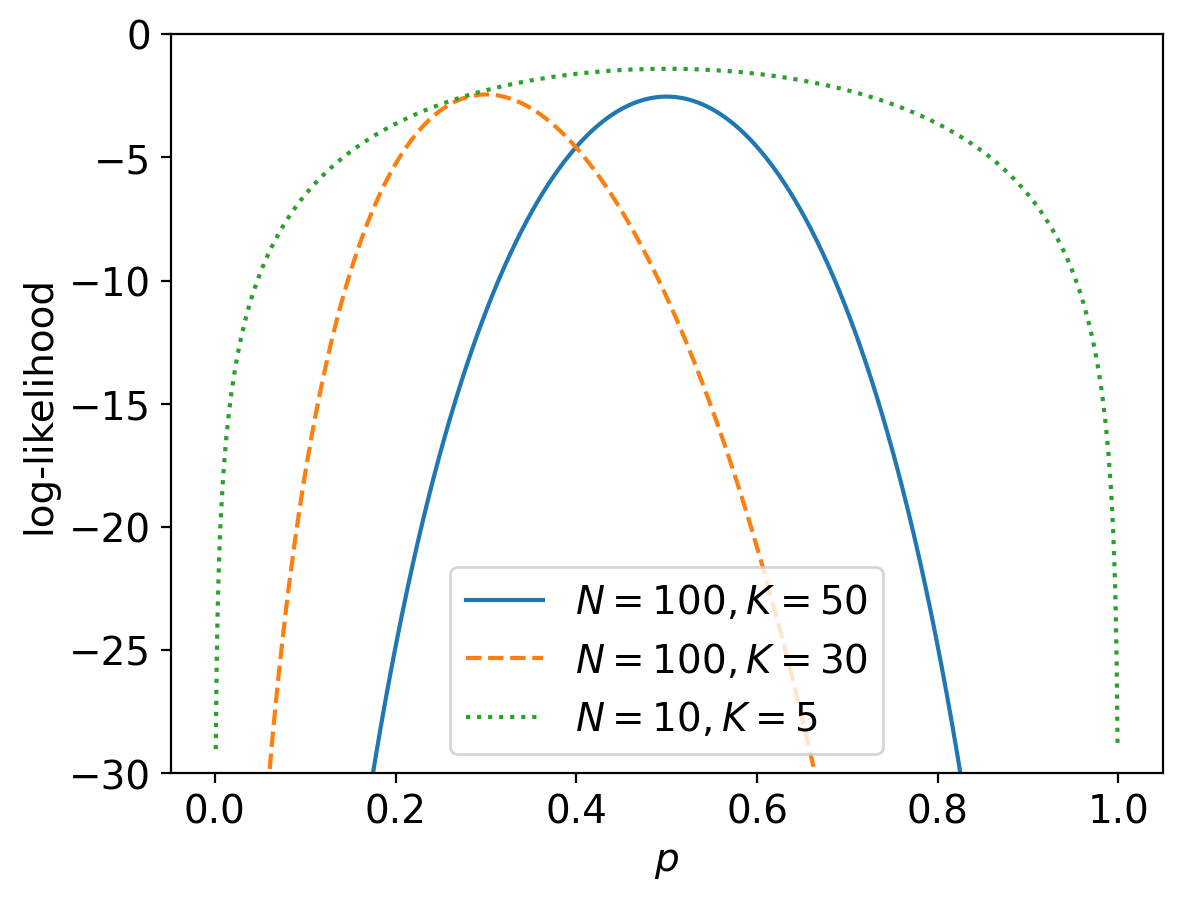

In [27]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def log_likelihood(p, N, K):
    return K * np.log(p) + (N-K) * np.log1p(-p) + np.log(comb(N, K))

p = np.linspace(0, 1, 1001)[1:-1]

plt.plot(p, log_likelihood(p, 100, 50), label="$N=100, K=50$");
plt.plot(p, log_likelihood(p, 100, 30), ls="--", label="$N=100, K=30$");
plt.plot(p, log_likelihood(p, 10, 5), ls=":", label="$N=10, K=5$");

plt.ylim(-30, 0);
plt.xlabel("$p$");
plt.ylabel("log-likelihood");
plt.legend();

## A. Coin Flips

We flip a coin $N=100$ times and we want to know at least how many heads we need to see 
to say that the coin favors heads at a $2\sigma$ level.
Let $K$ denote the number of heads we observe. 

 


### Questions

1. **Estimate your answer using MLE.** The MLE for the heads probability is $\hat{p} = K/N$. 
   The uncertainty of $\hat{p}$ can be estimated with Fisher information:
   
   $$
     \sigma_p = \left(\left. - \frac{d^2}{dp^2} \left[\ln L(p)\right] \right\vert_{p=\hat{p}} \right)^{-1/2} 
   $$

   To say that the coin favors heads at a $2\sigma$ level, we should have $\hat{p} > 0.5 + 2 \sigma_p$ 
   (that is, the heads probability is $2\sigma$ above fair).

   Express both $\hat{p}$ and $\sigma_p$ in terms of $K$ and $N$, then set $N=100$ and find the minimal value of $K$
   for the inequality to hold.

2. **Estimate your answer with a direct simulation.** 

   Simulate a fair coin flip for $N=100$ times, record the number of heads. 
   Repeat this simulation for 10,000 times, and then make a histogram of the number of heads (you should have 10,000 such values).

   This histogram would look like a normal distribution, and
   we can use the normal distribution to translate $2\sigma$ into percentiles, which would be 2.275% (lower) and 97.725% (higher).
   Out of the 10,000 simulations, find the value number of heads at the percentile of 97.725%.

3. Compare your answers from 1 and 2. Do they agree? 

--- 
*// Add your answers here*


---

In [37]:
# Include your implementation for Part A here


## B. Estimator Properties

A continuous uniform distribution $U(a,b)$ has a probability density function with a constant value $1/(b-a)$ when $a \leq x < b$, and $0$ elsewhere. 

Let's say we have a set of $N$ numbers ${x_1, x_2, \dots, x_N}$, and we know they are sampled from $U(a,b)$.
However, we do not know the values of the parameters $a$ and $b$. 

Use MLE to estimate $a$ and $b$, we have $\hat{a} = \min_{i} x_i$ (the smallest value of $x_i$) and $\hat{b} = \max_{i} x_i$ (the largest value of $x_i$). 

### Questions

1. Are $\hat{a}$ and $\hat{b}$ consistent estimators (that is, as $N$ increases, does the estimator converge towards the true value)? 
   Reason your answer, and then verify it with simulations.

2. For a given finite $N$, are $\hat{a}$ and $\hat{b}$ unbiased estimators (that is, are the expected value of the estimator and the true value equal)? 
   Reason your answer, and then verify it with simulations.

### How to verify

Choose two of your favorite numbers as the true values for $a$ and $b$ (with $a < b$). 

1. - Generate $N=10$ random numbers and calculate $\hat{a}$ and $\hat{b}$. 
   - Repeat many times but each time with a different value of $N$ (e.g., 10, 100, 1000, 10,000)
   - Find out how $\hat{a}$ and $\hat{b}$ vary with $N$ and whether they approach $a$ and $b$ as $N$ increases.

2. - Choose a value of $N$ (e.g., 100) and keep it fixed for this part.
   - Generate $N$ random numbers and calculate $\hat{a}$ and $\hat{b}$. 
   - Repeat many times ($K$ times) with the fixed value of $N$.
   - Calculate the sample average of $\hat{a}$ and $\hat{b}$. 
   - Recall that as you increase your simulation sample size (that is $K$, *not* $N$), the sample average would approach the expected value.
   - Find out whether $\hat{a}$ and $\hat{b}$ approach $a$ and $b$ as $K$ increases.

--- 
*// Write your answers here*


---

In [41]:
# Include your implementation for Part B here

## Final question

Roughly how much time did you spend on this lab (*not* including the time you spent in class)?

--- 
*// Write your answers here*


---

:::{tip}
**How to submit this notebook on Canvas?**

Once you complete this lab and have all your code, text answers, and all the desired results after running the notebook properly displayed in this notebook, 
please convert the notebook into HTML format by running the following:

```sh
jupyter nbconvert --to html /path/to/labs/03.ipynb 
```

Then, upload the resulting HTML file to Canvas for the corresponding assignment. 
:::